In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
###Reading the dataset
df = pd.read_csv("C:/Users/poona/OneDrive/Desktop/Census Data.csv")
df.head()

from sklearn import metrics


In [6]:
df.shape #Checking the shape of the dataframe

(48842, 15)

In [7]:
df.info()  #checking columns datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  Salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df.isnull().sum() ##Checking the null values

##no null values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64

In [9]:
df.describe() #Statistical analysis

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
###Checking the target variable
df.Salary.value_counts(normalize=True)

<=50K    0.760718
>50K     0.239282
Name: Salary, dtype: float64

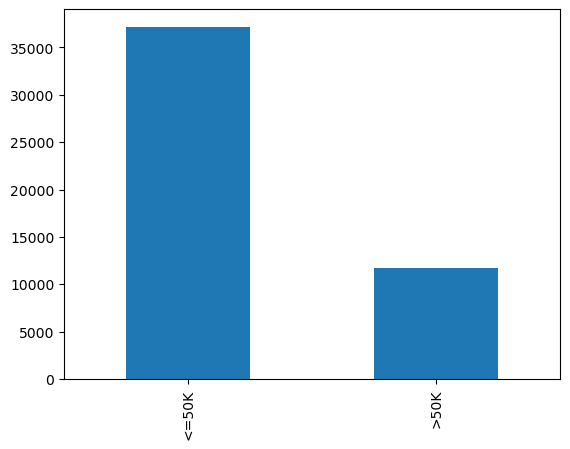

In [11]:
###Visualising the target variable for checking whether the dataset is imbalanced or not
df.Salary.value_counts().plot(kind='bar')
plt.show()

In [12]:
##Separating all the numerical columns  
num_var = [x for x in df.columns if df[x].dtype =="int64"]
num_var

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [13]:
##categorical variables
cat_var = [x for x in df.columns if x not in num_var]
cat_var

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Salary']

In [14]:
###Checking the unique values and their counts in each categorical variable(Non-Graphical)
for i in cat_var:
    print("-----"+i+"-----")
    print(df[i].value_counts(normalize=True))
    print("\n")

-----workclass-----
Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64


-----education-----
HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: education, dtype: float64


-----marital-status-----
Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Ma

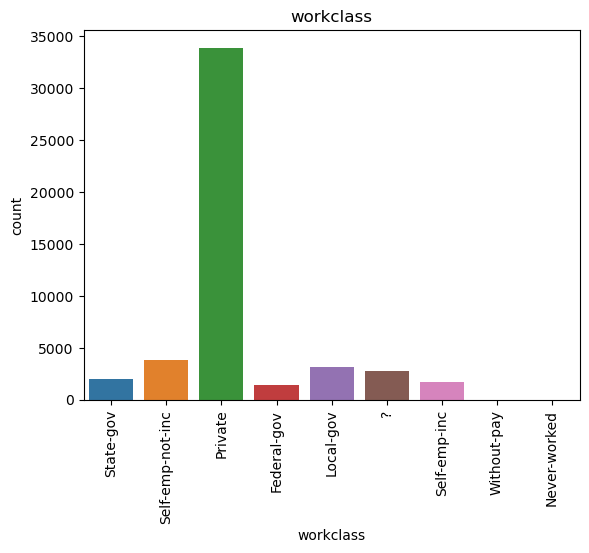

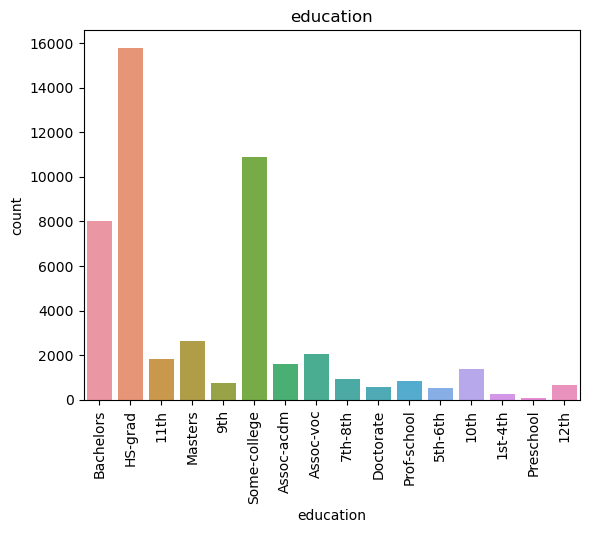

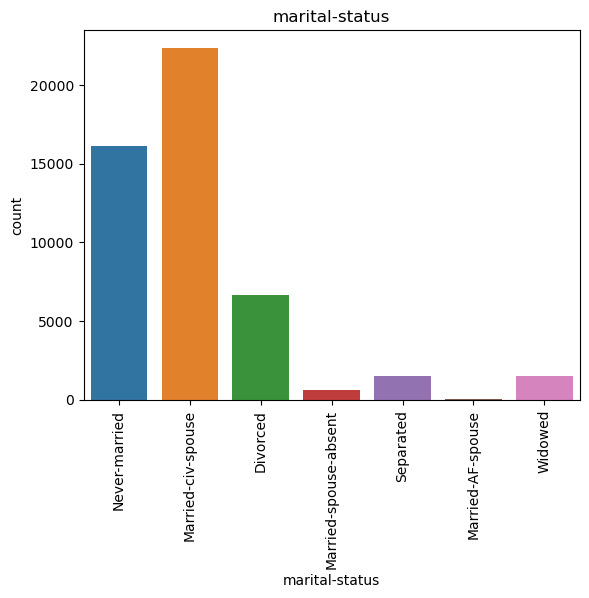

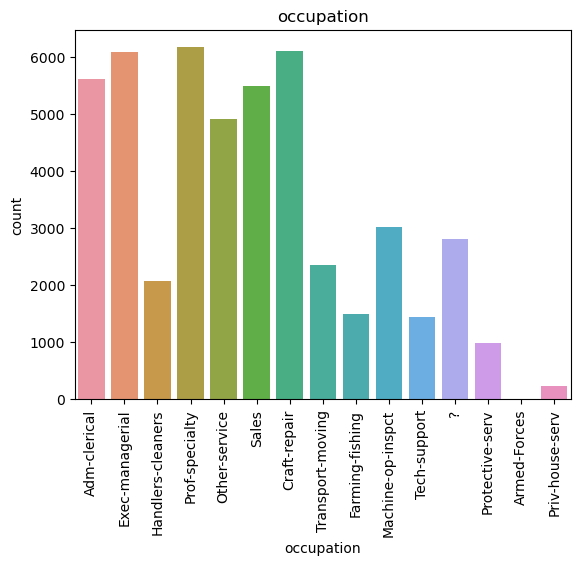

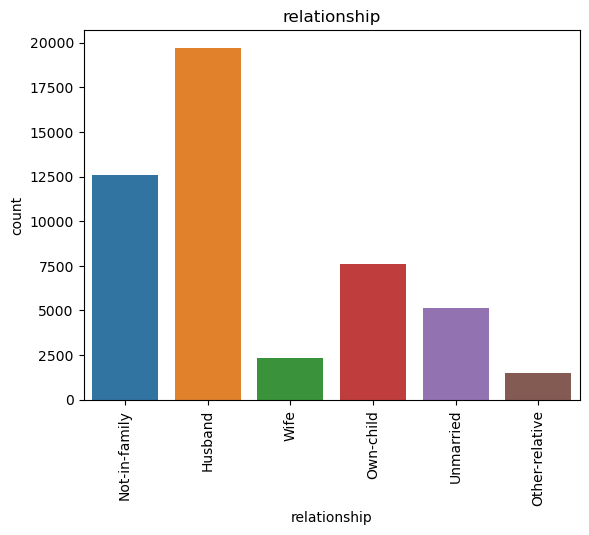

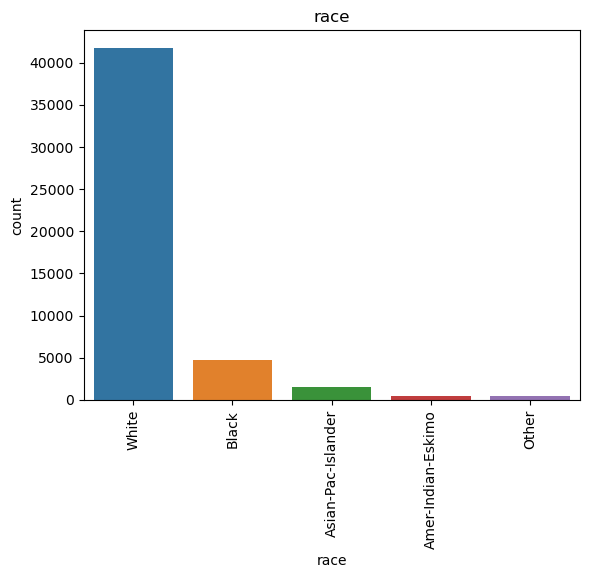

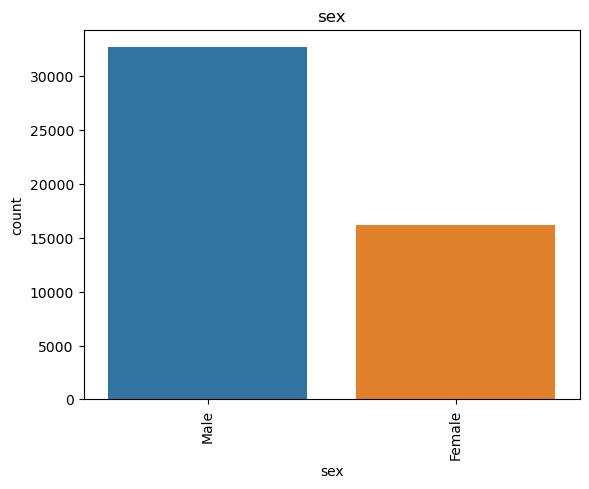

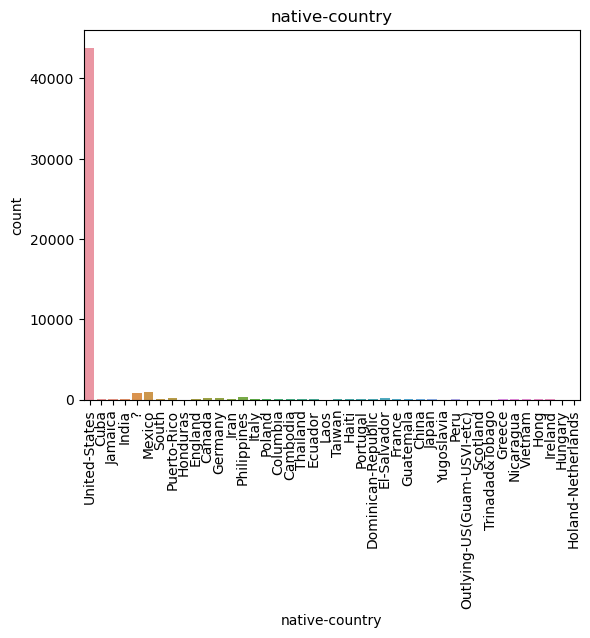

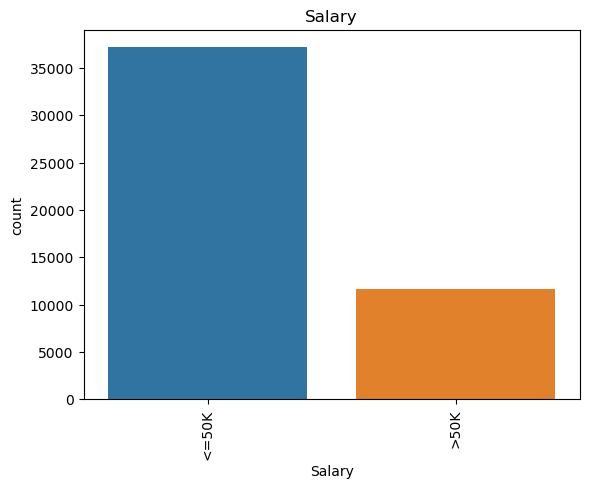

In [15]:
##unique value graphical reprrsentation
for i in cat_var:
    plt.title(i)
    sns.countplot(x = df[i])
    
    plt.xticks(rotation=90)
    plt.show()

In [16]:
##Now,we will perform bucketing on the categorical columns to bucket the categories together 
#whose value_count is very lesser

###On workclass
def assign(x):
    check = ['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']
    if x in check:
        return "others"
    else:
        return x

df["workclass"] = pd.DataFrame(map(assign,df["workclass"]))
df["workclass"].value_counts(normalize=True)

Private             0.694198
others              0.105217
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
Name: workclass, dtype: float64

In [17]:
###On education 
def assign(x):
    check = ['10th','7th-8th','Prof-school','9th','12th','Doctorate','5th-6th','1st-4th','Preschool']
    if x in check:
        return "others"
    else:
        return x

df["education"] = pd.DataFrame(map(assign,df["education"]))
df["education"].value_counts(normalize=True)

HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
others          0.123336
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
Name: education, dtype: float64

In [18]:
#marital-status
def assign(x):
    check = ['Widowed', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse']
    if x in check:
        return "others"
    else:
        return x

df["marital-status"] = pd.DataFrame(map(assign,df["marital-status"]))
df["marital-status"].value_counts(normalize=True)

Married-civ-spouse    0.458192
Never-married         0.329982
Divorced              0.135805
others                0.076021
Name: marital-status, dtype: float64

In [19]:
#occupation
def assign(x):
    check = ['others','Transport-moving','Handlers-cleaners','Farming-fishing','Tech-support','Protective-serv','Priv-house-serv','Armed-Forces']
    if x in check:
        return "others"
    else:
        return x

df["occupation"] = pd.DataFrame(map(assign,df["occupation"]))
df["occupation"].value_counts(normalize=True)

others               0.176139
Prof-specialty       0.126367
Craft-repair         0.125138
Exec-managerial      0.124606
Adm-clerical         0.114881
Sales                0.112690
Other-service        0.100794
Machine-op-inspct    0.061873
?                    0.057512
Name: occupation, dtype: float64

In [20]:
#race
def assign(x):
    check = ['Amer-Indian-Eskimo','Other','Asian-Pac-Islander']
    if x in check:
        return "others"
    else:
        return x

df["race"] = pd.DataFrame(map(assign,df["race"]))
df["race"].value_counts()

White     41762
Black      4685
others     2395
Name: race, dtype: int64

In [21]:
#native-country
def assign(x):
    check = ['Greece','Vietnam', 'China','Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada','South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran','England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba','Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic','Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala','Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland','Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)','others']
    if x in check:
        return "others"
    else:
        return x

df["native-country"] = pd.DataFrame(map(assign,df["native-country"]))
df['native-country'].value_counts(normalize=True)

United-States    0.897424
others           0.065558
Mexico           0.019471
?                0.017546
Name: native-country, dtype: float64

In [22]:
##Replacing the ? sign in "Workclass","occupation","native-country" columns
df["workclass"] = df["workclass"].replace("?","others")
df["occupation"] = df["occupation"].replace("?","others")
df["native-country"] = df["native-country"].replace("?","others")

In [23]:
#Analysis of Numerical Column
df['age'].describe([0.25,0.5,0.75,1])

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
100%        90.000000
max         90.000000
Name: age, dtype: float64

In [24]:
df['fnlwgt'].describe([0.25,0.5,0.75,1])

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
100%     1.490400e+06
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [25]:
df['education-num'].describe([0.25,0.5,0.75,1])

count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
100%        16.000000
max         16.000000
Name: education-num, dtype: float64

In [26]:
df['capital-gain'].describe([0.25,0.5,0.75,0.8,0.85,0.9,0.95,0.99,1])

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
90%          0.000000
95%       5013.000000
99%      15024.000000
100%     99999.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [27]:
df['capital-loss'].describe([0.25,0.5,0.75,0.8,0.85,0.9,0.95,0.99,1])

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
90%          0.000000
95%          0.000000
99%       2001.000000
100%      4356.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [28]:
##Dropping the column column "capital-loss" as almost 95% values are 0s .So the data is highly skewed
df.drop("capital-loss",1,inplace=True)

In [29]:
#Creating dummy variables
### 'relationship'
rel =pd.get_dummies(df[["relationship"]],drop_first = True)
df = pd.concat([df,rel],axis=1)
### 'native-country'
nc = pd.get_dummies(df[["native-country"]],drop_first = True) 
df = pd.concat([df,nc],axis=1)
#### 'workclass'
wc = pd.get_dummies(df[["workclass"]],drop_first = True)
df = pd.concat([df,wc],axis=1)
### 'marital-status'
ms = pd.get_dummies(df[["marital-status"]],drop_first = True)
df = pd.concat([df,ms],axis=1)
### 'education' 
edu = pd.get_dummies(df[["education"]],drop_first = True)
df = pd.concat([df,edu],axis=1)
### 'race'
race = pd.get_dummies(df[["race"]],drop_first = True)
df = pd.concat([df,race],axis=1) 
### 'occupation'
occu =pd.get_dummies(df[["occupation"]],drop_first = True)
df = pd.concat([df,occu],axis=1) 
##checking data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,education_others,race_White,race_others,occupation_Craft-repair,occupation_Exec-managerial,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_others
0,39,others,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,1,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,1,0,0,1,0,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,others,Not-in-family,White,Male,...,0,1,0,0,0,0,0,0,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,others,Husband,Black,Male,...,0,0,0,0,0,0,0,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,0,0,1,0,0


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gender_encoded = le.fit_transform(df['sex'])
print(gender_encoded)

[1 1 1 ... 1 1 1]


In [31]:
df['encoded_gender'] = gender_encoded
print(df)

       age         workclass  fnlwgt  education  education-num  \
0       39            others   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64            others  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35            others  182148  Bachelors             13   

           marital-status       occupation    relationship    race     sex  \
0           Never-married     Adm-clerical   Not-in-family   White    Male   
1      Married-civ-spouse  Exec-managerial         

In [32]:
df["encoded_gender"].value_counts()

1    32650
0    16192
Name: encoded_gender, dtype: int64

In [33]:
###dropping the columns as dummy has been created
df.drop(['workclass','education','marital-status','occupation','relationship','race','sex','native-country'],axis=1,inplace=True)

In [34]:
##Treating the target variable(if income >50K then it is 1 else it is 0)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
salary_encoded = le.fit_transform(df['Salary'])
print(salary_encoded)

[0 0 0 ... 0 0 1]


In [35]:
df['encoded_salary'] = salary_encoded
print(df)

       age  fnlwgt  education-num  capital-gain  hours-per-week Salary  \
0       39   77516             13          2174              40  <=50K   
1       50   83311             13             0              13  <=50K   
2       38  215646              9             0              40  <=50K   
3       53  234721              7             0              40  <=50K   
4       28  338409             13             0              40  <=50K   
...    ...     ...            ...           ...             ...    ...   
48837   39  215419             13             0              36  <=50K   
48838   64  321403              9             0              40  <=50K   
48839   38  374983             13             0              50  <=50K   
48840   44   83891             13          5455              40  <=50K   
48841   35  182148             13             0              60   >50K   

       relationship_Not-in-family  relationship_Other-relative  \
0                               1            

In [36]:
df["encoded_salary"].value_counts()

0    37155
1    11687
Name: encoded_salary, dtype: int64

In [37]:
### Creating X and y 
X = df.drop("Salary",axis=1)
X.head()

,age,fnlwgt,education-num,capital-gain,hours-per-week,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,...,race_others,occupation_Craft-repair,occupation_Exec-managerial,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_others,encoded_gender,encoded_salary
0,39,77516,13,2174,40,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,83311,13,0,13,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,38,215646,9,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,53,234721,7,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,28,338409,13,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [38]:
y = df["Salary"]
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: Salary, dtype: object

In [39]:
#Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
###Splitting the data into train-test set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)

In [41]:
##Feature Scaling
#instantiate 
scaler = StandardScaler()

In [42]:
##Have to remove 'capital-loss' since we have removed it from our main dataframe
num_var.remove('capital-loss')

In [43]:
#Fit_Transform
X_train[num_var] = scaler.fit_transform(X_train[num_var])

In [44]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,hours-per-week,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,...,race_others,occupation_Craft-repair,occupation_Exec-managerial,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_others,encoded_gender,encoded_salary
1324,0.026602,-1.002294,-0.417943,-0.144407,-0.032684,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
43063,-0.192488,-1.182498,1.521290,-0.144407,1.582837,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
23295,0.026602,-0.331960,-0.417943,1.008116,0.775076,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
40697,-0.776727,-1.297543,-2.357176,-0.144407,-0.032684,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
834,2.436591,-1.523075,-1.193636,-0.144407,-1.325101,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
#Model Building with KNN(K Nearest Neighbour)¶
#Training the model 
knn = KNeighborsClassifier(n_neighbors=9) ###k=9
knn = knn.fit(X_train,y_train)

In [46]:
##Transform on the test set
X_test[num_var] = scaler.transform(X_test[num_var])

In [47]:
pred = knn.predict(X_test)
pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [48]:
##Printing the confusion matrix
print(confusion_matrix(y_test,pred))

[[7362   53]
 [ 225 2129]]


In [49]:
#Classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       <=50K       0.97      0.99      0.98      7415
        >50K       0.98      0.90      0.94      2354

    accuracy                           0.97      9769
   macro avg       0.97      0.95      0.96      9769
weighted avg       0.97      0.97      0.97      9769



In [ ]:
from sklearn import metrics
#Analisng the accuracy by increasing the number of K
scores = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

sns.lineplot(range(1,30), scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("Respective accuracy when increased the number of K")
plt.grid(True)
plt.show()

In [ ]:
###So,the model has 97% accuracy rate & it has also very good f1-score